In [1]:
import pandas as pd
import re
import math
import numpy as np
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import os

def preprocess_text(text, remPunct=True):
    text = text.lower()
    if remPunct:
        text = re.sub(r'[^\w\s]', '', text)
    return text

def calculate_cosine_similarity(sentence1, sentence2):
    # Calculate cosine similarity between two sentences

    def vectorize(sentence):
        words = sentence.split()
        word_freq = {word: words.count(word) for word in set(words)}
        return word_freq

    vec_sentence1 = vectorize(sentence1)
    vec_sentence2 = vectorize(sentence2)

    intersection = set(vec_sentence1.keys()) & set(vec_sentence2.keys())
    dot_product = sum(vec_sentence1[word] * vec_sentence2[word] for word in intersection)

    magnitude1 = math.sqrt(sum(vec_sentence1[word] ** 2 for word in vec_sentence1))
    magnitude2 = math.sqrt(sum(vec_sentence2[word] ** 2 for word in vec_sentence2))
    
    if magnitude1 * magnitude2 == 0 :
        return 0
    else :
        return dot_product / (magnitude1 * magnitude2)
    
def calculate_cos_sentence_similarity(text):
    # Calculate cosine similarity between adjacent sentences in the text

    sentences = text.split('.')
    sentence_similarity = []

    for i in range(len(sentences) - 1):
        similarity = calculate_cosine_similarity(sentences[i], sentences[i + 1])
        sentence_similarity.append(similarity)

    return sentence_similarity

def topic_segmentation_sim(text, threshold=0.3):
    # Perform text segmentation based on sentence similarity

    text = preprocess_text(text, remPunct = False)

    # Step 1: Calculate sentence similarity scores
    sentence_similarity = calculate_cos_sentence_similarity(text)

    # Step 2: Identify potential boundaries based on sentence similarity
    boundaries = [0]

    for i in range(1, len(sentence_similarity)):
        if sentence_similarity[i] < threshold:
            boundaries.append(i)

    boundaries.append(len(sentence_similarity))

    # Step 3: Segment the text into topics based on the identified boundaries
    topics = []
    for i in range(len(boundaries) - 1):
        start = boundaries[i]
        end = boundaries[i + 1]
        topic_text = '.'.join(text.split('.')[start:end])
        topics.append(topic_text)

    return topics

In [2]:
choi_folder_path = "data/choi"

# Function to extract segments from a file
def extract_segments(file_path):
    with open(file_path, "r") as file:
        segmented_text = file.read()

    # Split the text by "==========" 
    segments = segmented_text.strip().split("==========")

    # Remove any  whitespace from each segment and remove empty segments
    segments = [segment.strip() for segment in segments if segment.strip()]
    
    return segments

data = []

# Walk through all subdirectories of choi folder
for root, _, files in os.walk(choi_folder_path):
    for file in files:
        if file.endswith(".ref"):
            file_path = os.path.join(root, file)
            segments = extract_segments(file_path)
            united_text = " ".join(segments)  # Combine segments into a single text
            data.append({
                "File": file_path,
                "Number of segments": len(segments),
                "segments": segments,
                "united_text": united_text
            })

df = pd.DataFrame(data)


# df.to_csv("segments_data_with_united_text.csv", index=False)

# Display the DataFrame
df.head()

,File,Number of segments,segments,united_text
0,data/choi\1\3-11\0.ref,10,[Santa Barbara -- `` The present recovery move...,Santa Barbara -- `` The present recovery movem...
1,data/choi\1\3-11\1.ref,10,[The vast Central Valley of California is one ...,The vast Central Valley of California is one o...
2,data/choi\1\3-11\10.ref,10,[The bronchus and pulmonary artery in this lun...,The bronchus and pulmonary artery in this lung...
3,data/choi\1\3-11\11.ref,10,[The Fulton County Grand Jury said Friday an i...,The Fulton County Grand Jury said Friday an in...
4,data/choi\1\3-11\12.ref,10,[Temperature of the wash and rinse waters is m...,Temperature of the wash and rinse waters is ma...


# Method 2: Word frequency vectorizer with cosine similarity

Topic 1:
text segmentation, also known as text splitting, is the process of dividing a continuous text into segments or sections based on some patterns or criteria. these segments are intended to represent different topics or themes present in the text. text segmentation is a common technique used in natural language processing (nlp) and information retrieval tasks
-----------

Topic 2:
there are several methods and algorithms for text segmentation. one such method is called texttiling
-----------

Topic 3:
texttiling is a technique developed by marti hearst in 1994
-----------

Topic 4:
it is mainly used for segmenting longer texts, such as essays, articles, or documents. texttiling relies on finding patterns in word frequencies and co-occurrences to identify boundaries between different topics.

in this example, we will implement a basic python code to perform topic segmentation without using nltk's texttilingtokenizer. instead, we will implement the segmentation based on sentence si

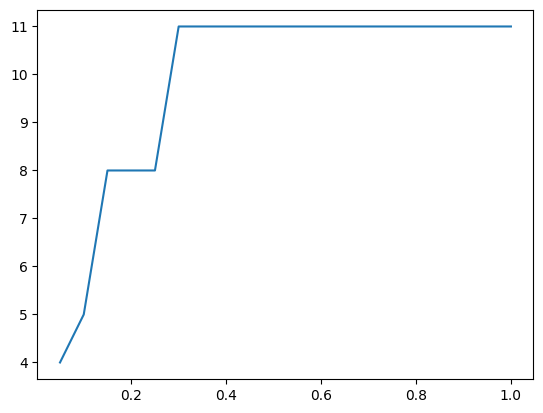

In [3]:
sample_text = """
Text segmentation, also known as text splitting, is the process of dividing a continuous text into segments or sections based on some patterns or criteria. These segments are intended to represent different topics or themes present in the text. Text segmentation is a common technique used in natural language processing (NLP) and information retrieval tasks.

There are several methods and algorithms for text segmentation. One such method is called TextTiling. TextTiling is a technique developed by Marti Hearst in 1994. It is mainly used for segmenting longer texts, such as essays, articles, or documents. TextTiling relies on finding patterns in word frequencies and co-occurrences to identify boundaries between different topics.

In this example, we will implement a basic Python code to perform topic segmentation without using NLTK's TextTilingTokenizer. Instead, we will implement the segmentation based on sentence similarity using cosine similarity measure.

Let's get started with the implementation.
"""

segmented_topics = topic_segmentation_sim(sample_text, threshold=0.1)
for i, topic in enumerate(segmented_topics, start=1):
    print(f"Topic {i}:")
    print(topic.strip())
    print("-----------\n")

threshold = []
num_topics = []

for i in range(20) :
    thres = 0 + (i+1)/20.0
    segmented_topics = topic_segmentation_sim(sample_text, threshold=thres)
    threshold.append(thres)
    num_topics.append(len(segmented_topics))
    
plt.plot(threshold, num_topics)

Topic 1:
santa barbara -- `` the present recovery movement will gather steady momentum to lift the economy to a new historic peak by this autumn '' , beryl w. sprinkel , economist of harris trust & savings bank , chicago , predicted at the closing session here tuesday of investment bankers assn. , california group , conference . 
another speaker , william h. draper , jr
-----------

Topic 2:
, former under secretary of the army and now with the palo alto venture capital firm of draper , gaither & anderson , urged the u
-----------

Topic 3:
s
-----------

Topic 4:
to `` throw down the gauntlet of battle to communism and tell moscow bluntly we wo n't be pushed around any more ''
-----------

Topic 5:
he urged support for president kennedy 's requests for both defense and foreign aid appropriations . 
' not flash in pan ' sprinkel told conferees that the recent improvement in economic activity was not a `` temporary flash in the pan '' but the beginning of a substantial cyclical expansio

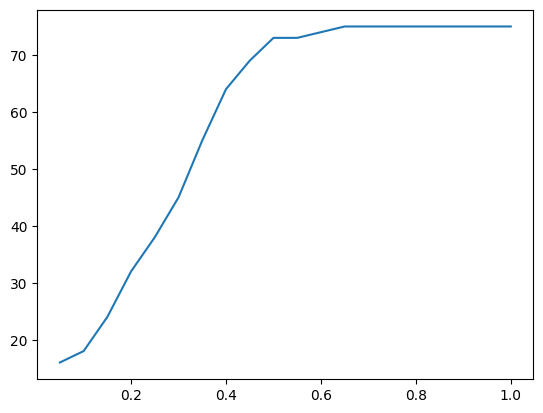

In [4]:
sample_text = df['united_text'][0]

segmented_topics = topic_segmentation_sim(sample_text, threshold=0.1)
for i, topic in enumerate(segmented_topics, start=1):
    print(f"Topic {i}:")
    print(topic.strip())
    print("-----------\n")

threshold = []
num_topics = []

for i in range(20) :
    thres = 0 + (i+1)/20.0
    segmented_topics = topic_segmentation_sim(sample_text, threshold=thres)
    threshold.append(thres)
    num_topics.append(len(segmented_topics))
    
plt.plot(threshold, num_topics)

In [5]:
def preprocess_text(text, remPunct=True):
    text = text.lower()
    if remPunct:
        text = re.sub(r'[^\w\s]', '', text)
    return text

def calculate_cosine_similarity(sentence1, sentence2):
    # Calculate cosine similarity between two sentences

    def vectorize(sentence):
        words = sentence.split()
        word_freq = {word: words.count(word) for word in set(words)}
        return word_freq

    vec_sentence1 = vectorize(sentence1)
    vec_sentence2 = vectorize(sentence2)

    intersection = set(vec_sentence1.keys()) & set(vec_sentence2.keys())
    dot_product = sum(vec_sentence1[word] * vec_sentence2[word] for word in intersection)

    magnitude1 = math.sqrt(sum(vec_sentence1[word] ** 2 for word in vec_sentence1))
    magnitude2 = math.sqrt(sum(vec_sentence2[word] ** 2 for word in vec_sentence2))
    
    if magnitude1 * magnitude2 == 0 :
        return 0
    else :
        return dot_product / (magnitude1 * magnitude2)
    
def calculate_cos_sentence_similarity(text):
    # Calculate cosine similarity between adjacent sentences in the text

    sentences = text.split('.')
    sentence_similarity = []

    for i in range(len(sentences) - 1):
        similarity = calculate_cosine_similarity(sentences[i], sentences[i + 1])
        sentence_similarity.append(similarity)

    return sentence_similarity
def topic_segmentation_sim(text, threshold=0.5):
    # Perform text segmentation into exactly 10 topics while considering topic changes

    # Preprocess the text (you need to define the preprocess_text function)
    text = preprocess_text(text, remPunct=False)

    # Step 1: Calculate sentence similarity scores
    sentence_similarity = calculate_cos_sentence_similarity(text)

    # Step 2: Identify potential boundaries based on sentence similarity
    boundaries = [0]

    for i in range(1, len(sentence_similarity)):
        if sentence_similarity[i] < threshold:
            boundaries.append(i)

    boundaries.append(len(sentence_similarity))

    # Calculate the average number of sentences per topic
    avg_sentences_per_topic = len(sentence_similarity) // 10

    # Ensure exactly 10 topics
    if len(boundaries) < 11:
        num_missing_topics = 11 - len(boundaries)
        for _ in range(num_missing_topics):
            min_similarity_index = sentence_similarity.index(min(sentence_similarity))
            boundaries.append(min_similarity_index)

    # Refine boundaries to ensure exactly 10 topics
    refined_boundaries = [boundaries[0]]
    for i in range(1, len(boundaries)):
        if len(refined_boundaries) >= 10:
            break
        if (i - refined_boundaries[-1]) >= avg_sentences_per_topic:
            refined_boundaries.append(i)

    refined_boundaries.append(len(sentence_similarity))

    # Step 3: Segment the text into topics based on the refined boundaries
    topics = []
    for i in range(len(refined_boundaries) - 1):
        start = refined_boundaries[i]
        end = refined_boundaries[i + 1]
        topic_text = '.'.join(text.split('.')[start:end])
        topics.append(topic_text)

    return topics


In [6]:
sample_text = df['united_text'][0]

segmented_topics = topic_segmentation_sim(sample_text, threshold=0.5)
for i, topic in enumerate(segmented_topics, start=1):
    print(f"Topic {i}:")
    print(topic.strip())
    print("-----------\n")

Topic 1:
santa barbara -- `` the present recovery movement will gather steady momentum to lift the economy to a new historic peak by this autumn '' , beryl w. sprinkel , economist of harris trust & savings bank , chicago , predicted at the closing session here tuesday of investment bankers assn. , california group , conference . 
another speaker , william h. draper , jr. , former under secretary of the army and now with the palo alto venture capital firm of draper , gaither & anderson , urged the u.s
-----------

Topic 2:
to `` throw down the gauntlet of battle to communism and tell moscow bluntly we wo n't be pushed around any more '' . 
he urged support for president kennedy 's requests for both defense and foreign aid appropriations . 
' not flash in pan ' sprinkel told conferees that the recent improvement in economic activity was not a `` temporary flash in the pan '' but the beginning of a substantial cyclical expansion that will carry the economy back to full employment levels a

In [7]:
actual_segments = df['segments'][0]

In [8]:
# List of threshold values to test
threshold_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Calculate similarity scores for each threshold
for threshold in threshold_range:
    predicted_segments = topic_segmentation_sim(sample_text, threshold=threshold)
    
    # Check if the number of predicted segments is 10
    if len(predicted_segments) == 10:
        # Calculate similarity score for the obtained segments and actual segments
        similarity_scores = []
        for obtained_segment in predicted_segments:
            max_similarity = 0
            for actual_segment in actual_segments:
                similarity = calculate_cosine_similarity(obtained_segment, actual_segment)
                max_similarity = max(max_similarity, similarity)
            similarity_scores.append(max_similarity)

        # Print or store the similarity scores for this threshold
        print(f"Threshold: {threshold}, Similarity Scores: {similarity_scores}")
    else:
        # If not 10 segments, add zero similarity scores
        similarity_scores = [0] * len(predicted_segments)
        print(f"Threshold: {threshold}, Number of Predicted Segments: {len(predicted_segments)}, Similarity Scores: {similarity_scores}")


Threshold: 0.1, Number of Predicted Segments: 3, Similarity Scores: [0, 0, 0]
Threshold: 0.2, Number of Predicted Segments: 5, Similarity Scores: [0, 0, 0, 0, 0]
Threshold: 0.3, Number of Predicted Segments: 7, Similarity Scores: [0, 0, 0, 0, 0, 0, 0]
Threshold: 0.4, Similarity Scores: [0.7268265324689371, 0.8796650556373958, 0.9353013970694858, 0.9274966960178515, 0.9132813920934482, 0.9323666218469683, 0.9246641478458587, 0.8865223379372955, 0.862635772436732, 0.9821565832829157]
Threshold: 0.5, Similarity Scores: [0.7268265324689371, 0.8796650556373958, 0.9353013970694858, 0.9274966960178515, 0.9132813920934482, 0.9323666218469683, 0.9246641478458587, 0.8865223379372955, 0.862635772436732, 0.9821565832829157]
Threshold: 0.6, Similarity Scores: [0.7268265324689371, 0.8796650556373958, 0.9353013970694858, 0.9274966960178515, 0.9132813920934482, 0.9323666218469683, 0.9246641478458587, 0.8865223379372955, 0.862635772436732, 0.9821565832829157]
Threshold: 0.7, Similarity Scores: [0.72682

In [9]:
# List of threshold values to test
threshold_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Calculate and print the average similarity scores for each threshold
for threshold in threshold_range:
    predicted_segments = topic_segmentation_sim(sample_text, threshold=threshold)
    
    # Check if the number of predicted segments is 10
    if len(predicted_segments) == 10:
        # Calculate similarity score for the obtained segments and actual segments
        similarity_scores = []
        for obtained_segment in predicted_segments:
            max_similarity = 0
            for actual_segment in actual_segments:
                similarity = calculate_cosine_similarity(obtained_segment, actual_segment)
                max_similarity = max(max_similarity, similarity)
            similarity_scores.append(max_similarity)

        # Calculate the average similarity score
        avg_similarity = sum(similarity_scores) / len(similarity_scores)
        
        # Print the average similarity score for this threshold
        print(f"Threshold: {threshold}, Average Similarity Score: {avg_similarity}")
    else:
        # If not 10 segments, print an average similarity score of 0
        print(f"Threshold: {threshold}, Number of Predicted Segments: {len(predicted_segments)}, Average Similarity Score: 0")


Threshold: 0.1, Number of Predicted Segments: 3, Average Similarity Score: 0
Threshold: 0.2, Number of Predicted Segments: 5, Average Similarity Score: 0
Threshold: 0.3, Number of Predicted Segments: 7, Average Similarity Score: 0
Threshold: 0.4, Average Similarity Score: 0.8970916536636888
Threshold: 0.5, Average Similarity Score: 0.8970916536636888
Threshold: 0.6, Average Similarity Score: 0.8970916536636888
Threshold: 0.7, Average Similarity Score: 0.8970916536636888
Threshold: 0.8, Average Similarity Score: 0.8970916536636888
Threshold: 0.9, Average Similarity Score: 0.8970916536636888
Threshold: 1.0, Average Similarity Score: 0.8970916536636888


In [10]:
def calculate_boundaries(text):
    boundaries = []
    current_index = 0
    for segment in text:
        current_index += len(segment) + 1  # Add 1 for the period at the end of the sentence
        boundaries.append(current_index - 1)  # Subtract 1 to get the index of the period
    return boundaries

In [11]:
def calculate_percentage_error(predicted_values, actual_values):
    if len(predicted_values) != len(actual_values):
        raise ValueError("The predicted_values and actual_values lists must have the same length.")

    total_percentage_error = 0

    for i in range(1, len(predicted_values)):
        predicted = predicted_values[i]
        actual = actual_values[i]
        actual_previous = actual_values[i - 1]

        if actual_previous == 0:
            raise ValueError("Actual value cannot be zero.")

        segment_length = actual - actual_previous
        percentage_error = abs(predicted - actual) / segment_length * 100
        total_percentage_error += percentage_error

    average_percentage_error = total_percentage_error / (len(predicted_values) - 1)  # Subtract 1 for segments
    return average_percentage_error

In [12]:
import pandas as pd

# List of threshold values to test
threshold_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Calculate the average similarity score for a given threshold
def calculate_average_similarity(predicted_segments, actual_segments):
    if len(predicted_segments) != 10:
        return 0
    
    similarity_scores = []
    for obtained_segment in predicted_segments:
        max_similarity = 0
        for actual_segment in actual_segments:
            similarity = calculate_cosine_similarity(obtained_segment, actual_segment)
            max_similarity = max(max_similarity, similarity)
        similarity_scores.append(max_similarity)
    
    avg_similarity = sum(similarity_scores) / len(similarity_scores)
    return avg_similarity

# Calculate and store the average similarity scores for each threshold
for threshold in threshold_range:
    df[f'Predicted_segments_{threshold}'] = df['united_text'].apply(lambda text: topic_segmentation_sim(text, threshold=threshold))
    df[f'Avg_score_{threshold}'] = df.apply(lambda row: calculate_average_similarity(row[f'Predicted_segments_{threshold}'], row['segments']), axis=1)
    df[f'predicted_boundaries_{threshold}'] = df[f'Predicted_segments_{threshold}'].apply(calculate_boundaries)
    df['actual_boundaries'] = df['segments'].apply(calculate_boundaries)

In [13]:
df.head()

,File,Number of segments,segments,united_text,Predicted_segments_0.1,Avg_score_0.1,predicted_boundaries_0.1,actual_boundaries,Predicted_segments_0.2,Avg_score_0.2,...,predicted_boundaries_0.7,Predicted_segments_0.8,Avg_score_0.8,predicted_boundaries_0.8,Predicted_segments_0.9,Avg_score_0.9,predicted_boundaries_0.9,Predicted_segments_1.0,Avg_score_1.0,predicted_boundaries_1.0
0,data/choi\1\3-11\0.ref,10,[Santa Barbara -- `` The present recovery move...,Santa Barbara -- `` The present recovery movem...,[santa barbara -- `` the present recovery move...,0,"[496, 1933, 9815]","[1297, 1934, 2615, 3426, 4580, 5165, 6145, 760...",[santa barbara -- `` the present recovery move...,0.0,...,"[496, 1933, 2629, 3542, 4401, 5177, 6492, 7743...",[santa barbara -- `` the present recovery move...,0.897092,"[496, 1933, 2629, 3542, 4401, 5177, 6492, 7743...",[santa barbara -- `` the present recovery move...,0.897092,"[496, 1933, 2629, 3542, 4401, 5177, 6492, 7743...",[santa barbara -- `` the present recovery move...,0.897092,"[496, 1933, 2629, 3542, 4401, 5177, 6492, 7743..."
1,data/choi\1\3-11\1.ref,10,[The vast Central Valley of California is one ...,The vast Central Valley of California is one o...,[the vast central valley of california is one ...,0,"[1401, 2273, 3774, 13341]","[1402, 2547, 4022, 5974, 7209, 8401, 9904, 110...",[the vast central valley of california is one ...,0.0,...,"[1401, 2273, 3774, 5754, 7208, 8400, 9227, 981...",[the vast central valley of california is one ...,0.896755,"[1401, 2273, 3774, 5754, 7208, 8400, 9227, 981...",[the vast central valley of california is one ...,0.896755,"[1401, 2273, 3774, 5754, 7208, 8400, 9227, 981...",[the vast central valley of california is one ...,0.896755,"[1401, 2273, 3774, 5754, 7208, 8400, 9227, 981..."
2,data/choi\1\3-11\10.ref,10,[The bronchus and pulmonary artery in this lun...,The bronchus and pulmonary artery in this lung...,[the bronchus and pulmonary artery in this lun...,0,"[667, 1468, 2297, 11296]","[1644, 2083, 3350, 5123, 5789, 7114, 7741, 955...",[the bronchus and pulmonary artery in this lun...,0.0,...,"[667, 1468, 2297, 3101, 4415, 5416, 7113, 7943...",[the bronchus and pulmonary artery in this lun...,0.894745,"[667, 1468, 2297, 3101, 4415, 5416, 7113, 7943...",[the bronchus and pulmonary artery in this lun...,0.894745,"[667, 1468, 2297, 3101, 4415, 5416, 7113, 7943...",[the bronchus and pulmonary artery in this lun...,0.894745,"[667, 1468, 2297, 3101, 4415, 5416, 7113, 7943..."
3,data/choi\1\3-11\11.ref,10,[The Fulton County Grand Jury said Friday an i...,The Fulton County Grand Jury said Friday an in...,[the fulton county grand jury said friday an i...,0,"[1083, 1868, 2518, 3051, 3790, 7516]","[1337, 1725, 2351, 2910, 3897, 4896, 5457, 652...",[the fulton county grand jury said friday an i...,0.0,...,"[1083, 1868, 2518, 3051, 3790, 4011, 4650, 545...",[the fulton county grand jury said friday an i...,0.834309,"[1083, 1868, 2518, 3051, 3790, 4011, 4650, 545...",[the fulton county grand jury said friday an i...,0.834309,"[1083, 1868, 2518, 3051, 3790, 4011, 4650, 545...",[the fulton county grand jury said friday an i...,0.834309,"[1083, 1868, 2518, 3051, 3790, 4011, 4650, 545..."
4,data/choi\1\3-11\12.ref,10,[Temperature of the wash and rinse waters is m...,Temperature of the wash and rinse waters is ma...,[temperature of the wash and rinse waters is m...,0,"[680, 1955, 2729, 3517, 12511]","[945, 1352, 2195, 4033, 5774, 7277, 8334, 9504...",[temperature of the wash and rinse waters is m...,0.0,...,"[680, 1955, 2729, 3517, 4951, 6164, 6955, 8333...",[temperature of the wash and rinse waters is m...,0.850198,"[680, 1955, 2729, 3517, 4951, 6164, 6955, 8333...",[temperature of the wash and rinse waters is m...,0.850198,"[680, 1955, 2729, 3517, 4951, 6164, 6955, 8333...",[temperature of the wash and rinse waters is m...,0.850198,"[680, 1955, 2729, 3517, 4951, 6164, 6955, 8333..."


In [14]:
predicted_boundaries = calculate_boundaries(df['Predicted_segments_0.4'][0])
predicted_boundaries

[496, 1933, 2629, 3542, 4401, 5177, 6492, 7743, 8075, 9815]

In [15]:
actual_boundaries = calculate_boundaries(df['segments'][0])
actual_boundaries

[1297, 1934, 2615, 3426, 4580, 5165, 6145, 7604, 8204, 9816]

In [16]:
# Example usage:
average_error = calculate_percentage_error(predicted_boundaries, actual_boundaries)
print(f"Average Percentage Error: {average_error:.2f}%")


Average Percentage Error: 11.18%


In [17]:
calculate_percentage_error(df['predicted_boundaries_0.9'][0], df['actual_boundaries'][0])

11.175103771858694

In [18]:
df['predicted_boundaries_0.9'].apply(len)

0      10
1      10
2      10
3      10
4      10
       ..
915    10
916    10
917    10
918    10
919    10
Name: predicted_boundaries_0.9, Length: 920, dtype: int64

In [22]:
threshold_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

for threshold in threshold_range:
    predicted_col = f'predicted_boundaries_{threshold}'
    error_col = f'average_percentage_error_{threshold}'
    
    # Check if lengths match
    df[error_col] = df.apply(lambda row: calculate_percentage_error(row[predicted_col], row['actual_boundaries'])
                             if len(row[predicted_col]) == len(row['actual_boundaries']) else 100, axis=1)

In [24]:
df.head(5)

,File,Number of segments,segments,united_text,Predicted_segments_0.1,Avg_score_0.1,predicted_boundaries_0.1,actual_boundaries,Predicted_segments_0.2,Avg_score_0.2,...,average_percentage_error_0.1,average_percentage_error_0.2,average_percentage_error_0.3,average_percentage_error_0.4,average_percentage_error_0.5,average_percentage_error_0.6,average_percentage_error_0.7,average_percentage_error_0.8,average_percentage_error_0.9,average_percentage_error_1.0
0,data/choi\1\3-11\0.ref,10,[Santa Barbara -- `` The present recovery move...,Santa Barbara -- `` The present recovery movem...,[santa barbara -- `` the present recovery move...,0,"[496, 1933, 9815]","[1297, 1934, 2615, 3426, 4580, 5165, 6145, 760...",[santa barbara -- `` the present recovery move...,0.0,...,100,100.0,100.0,11.175104,11.175104,11.175104,11.175104,11.175104,11.175104,11.175104
1,data/choi\1\3-11\1.ref,10,[The vast Central Valley of California is one ...,The vast Central Valley of California is one o...,[the vast central valley of california is one ...,0,"[1401, 2273, 3774, 13341]","[1402, 2547, 4022, 5974, 7209, 8401, 9904, 110...",[the vast central valley of california is one ...,0.0,...,100,100.0,100.0,32.698629,32.698629,32.698629,32.698629,32.698629,32.698629,32.698629
2,data/choi\1\3-11\10.ref,10,[The bronchus and pulmonary artery in this lun...,The bronchus and pulmonary artery in this lung...,[the bronchus and pulmonary artery in this lun...,0,"[667, 1468, 2297, 11296]","[1644, 2083, 3350, 5123, 5789, 7114, 7741, 955...",[the bronchus and pulmonary artery in this lun...,0.0,...,100,100.0,100.0,110.590731,110.590731,110.590731,110.590731,110.590731,110.590731,110.590731
3,data/choi\1\3-11\11.ref,10,[The Fulton County Grand Jury said Friday an i...,The Fulton County Grand Jury said Friday an in...,[the fulton county grand jury said friday an i...,0,"[1083, 1868, 2518, 3051, 3790, 7516]","[1337, 1725, 2351, 2910, 3897, 4896, 5457, 652...",[the fulton county grand jury said friday an i...,0.0,...,100,100.0,100.0,100.000000,59.171030,59.171030,59.171030,59.171030,59.171030,59.171030
4,data/choi\1\3-11\12.ref,10,[Temperature of the wash and rinse waters is m...,Temperature of the wash and rinse waters is ma...,[temperature of the wash and rinse waters is m...,0,"[680, 1955, 2729, 3517, 12511]","[945, 1352, 2195, 4033, 5774, 7277, 8334, 9504...",[temperature of the wash and rinse waters is m...,0.0,...,100,100.0,100.0,75.006024,75.006024,75.006024,75.006024,75.006024,75.006024,75.006024


In [52]:
error_columns = [f'average_percentage_error_{threshold}' for threshold in threshold_range]
error = df[error_columns].mean()
error

average_percentage_error_0.1    100.000000
average_percentage_error_0.2    100.010107
average_percentage_error_0.3     99.795078
average_percentage_error_0.4     76.767175
average_percentage_error_0.5     57.599991
average_percentage_error_0.6     56.950930
average_percentage_error_0.7     56.950930
average_percentage_error_0.8     56.950930
average_percentage_error_0.9     56.950930
average_percentage_error_1.0     56.950930
dtype: float64

In [51]:
Similarity_columns = [f'Avg_score_{threshold}' for threshold in threshold_range]
similarity = df[Similarity_columns].mean()
similarity

Avg_score_0.1    0.000000
Avg_score_0.2    0.001673
Avg_score_0.3    0.024714
Avg_score_0.4    0.506687
Avg_score_0.5    0.853903
Avg_score_0.6    0.868364
Avg_score_0.7    0.868364
Avg_score_0.8    0.868364
Avg_score_0.9    0.868364
Avg_score_1.0    0.868364
dtype: float64

In [53]:
dict(error)

{'average_percentage_error_0.1': 100.0,
 'average_percentage_error_0.2': 100.01010690943787,
 'average_percentage_error_0.3': 99.79507760079659,
 'average_percentage_error_0.4': 76.76717511002896,
 'average_percentage_error_0.5': 57.59999068152901,
 'average_percentage_error_0.6': 56.95093038827957,
 'average_percentage_error_0.7': 56.95093038827957,
 'average_percentage_error_0.8': 56.95093038827957,
 'average_percentage_error_0.9': 56.95093038827957,
 'average_percentage_error_1.0': 56.95093038827957}

In [61]:
pd.DataFrame(similarity.values,index=['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'])

,0
0.1,0.000000
0.2,0.001673
0.3,0.024714
0.4,0.506687
0.5,0.853903
0.6,0.868364
0.7,0.868364
0.8,0.868364
0.9,0.868364
1.0,0.868364


In [63]:
# Create DataFrames from the data
df1 = pd.DataFrame(similarity.values, index=['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'])
df2 = pd.DataFrame(error.values, index=['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'])

# Rename columns to 'error' and 'similarity'
df1.columns = ['similarity']
df2.columns = ['error']

# Combine the two DataFrames using pandas.concat
result_df = pd.concat([df1, df2], axis=1)

# Reset the index to have 'threshold' as a regular column
result_df

,similarity,error
0.1,0.000000,100.000000
0.2,0.001673,100.010107
0.3,0.024714,99.795078
0.4,0.506687,76.767175
0.5,0.853903,57.599991
0.6,0.868364,56.950930
0.7,0.868364,56.950930
0.8,0.868364,56.950930
0.9,0.868364,56.950930
1.0,0.868364,56.950930


In [66]:
result_df['similarity'].corr(result_df['error'])

-0.9995456662533019